# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [2]:
# read data from '.csv' file
dataset = pd.read_csv('winequality.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


dataset consists of 4898 rows and 12 columns

has 2 datatypes: float64(11), int64(1)

has no missing values

* ### Head

In [4]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [6]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1
dataset['quality'] = dataset.quality.apply(lambda q: 0 if q <= 6 else 1)

In [7]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [8]:
print('Not good wine', round(dataset['quality'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Good wine', round(dataset['quality'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

dataset['quality'].value_counts()

Not good wine 78.36 % of the dataset
Good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

<AxesSubplot:>

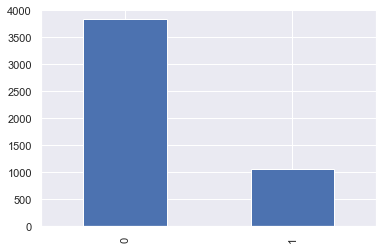

In [9]:
# visualisation plot
dataset['quality'].value_counts().plot(x = dataset['quality'], kind='bar')

* ### Resampling of an imbalanced dataset

In [10]:
# class count
count_class_0, count_class_1 = dataset.quality.value_counts()

# divide by class
class_0 = dataset[dataset['quality'] == 0]
class_1 = dataset[dataset['quality'] == 1]

* ### Random over-sampling of an imbalanced dataset

Random over-sampling:
0    3838
1    3838
Name: quality, dtype: int64


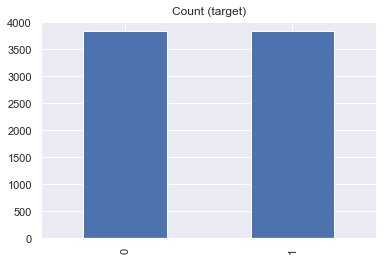

In [11]:
class_1_over = class_1.sample(count_class_0, replace=True)
dataset_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(dataset_over.quality.value_counts())

dataset_over.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Initialisation of target

In [12]:
# initialisation of target
# for over-sampling dataset
target_over = dataset_over['quality'] 

* ### Drop column 'quality'

In [13]:
# for over-sampling dataset
dataset_over = dataset_over.drop(columns=['quality'])

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [14]:
# StandardScaler 
sc = StandardScaler()

# for over-sampling dataset
dataset_sc = sc.fit_transform(dataset_over)

dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.252195,-0.037198,0.264223,3.055509,0.104523,0.617856,0.906796,2.514716,-1.283696,-0.372543,-1.554335
1,-0.602162,0.267101,0.079187,-0.901827,0.313882,-1.312447,-0.048100,0.193808,0.658892,-0.048670,-1.022973
2,1.594757,0.064235,0.634295,0.196282,0.366222,-0.316162,-0.927610,0.558522,0.399881,-0.453511,-0.567520
3,0.496297,-0.442930,-0.105848,0.527786,0.784940,0.742392,1.308858,0.724302,-0.053390,-0.777384,-0.719337
4,0.496297,-0.442930,-0.105848,0.527786,0.784940,0.742392,1.308858,0.724302,-0.053390,-0.777384,-0.719337


* ### Creating datasets for ML part

In [15]:
# set 'X' for features' and y' for the target ('quality')
# for over-sampling dataset 
y = target_over
X = dataset_sc.copy()

In [16]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.252195,-0.037198,0.264223,3.055509,0.104523,0.617856,0.906796,2.514716,-1.283696,-0.372543,-1.554335
1,-0.602162,0.267101,0.079187,-0.901827,0.313882,-1.312447,-0.048100,0.193808,0.658892,-0.048670,-1.022973
2,1.594757,0.064235,0.634295,0.196282,0.366222,-0.316162,-0.927610,0.558522,0.399881,-0.453511,-0.567520
3,0.496297,-0.442930,-0.105848,0.527786,0.784940,0.742392,1.308858,0.724302,-0.053390,-0.777384,-0.719337
4,0.496297,-0.442930,-0.105848,0.527786,0.784940,0.742392,1.308858,0.724302,-0.053390,-0.777384,-0.719337


* ### 'Train\Test' split

In [17]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [19]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [20]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [21]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.747175  0.690601  0.717775       766
           1   0.713768  0.767532  0.739675       770

    accuracy                       0.729167      1536
   macro avg   0.730472  0.729066  0.728725      1536
weighted avg   0.730428  0.729167  0.728753      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.914013  0.749347  0.823529       766
           1   0.788546  0.929870  0.853397       770

    accuracy                       0.839844      1536
   macro avg   0.851279  0.839609  0.838463      1536
weighted avg   0.851116  0.839844  0.838502      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.979412  0.869452  0.921162       766
           1   0.883178  0.981818  0.929889       770

    accuracy                       0.925781      1536
   macro avg   0.931295  0.925635  0.925526

* ### Confusion matrix

In [22]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[529 237]
 [179 591]]

KNN Confusion Matrix: 
 [[574 192]
 [ 54 716]]

DT Confusion Matrix: 
 [[666 100]
 [ 14 756]]



* ### ROC-AUC score

In [23]:
roc_auc_score(DT_pred, y_test)

0.9312946673996702

* ### Build, train and evaluate models with hyperparameters

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [54]:
# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Logistic Regression Best Hyper Parameters:    {'C': 1, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 5}
Decision Tree Best Hyper Parameters:          {'criterion': 'gini', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [55]:
print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.733146  0.681462  0.706360       766
           1   0.703883  0.753247  0.727729       770

    accuracy                       0.717448      1536
   macro avg   0.718515  0.717354  0.717044      1536
weighted avg   0.718477  0.717448  0.717072      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.905660  0.751958  0.821683       766
           1   0.788889  0.922078  0.850299       770

    accuracy                       0.837240      1536
   macro avg   0.847275  0.837018  0.835991      1536
weighted avg   0.847123  0.837240  0.836029      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.984104  0.889034  0.934156       766
           1   0.899289  0.985714  0.940520       770

    accuracy                       0.937500      1536
   macro avg   0.941697  0.937374  0.937338

* ### Confusion matrix

DT Confusion Matrix


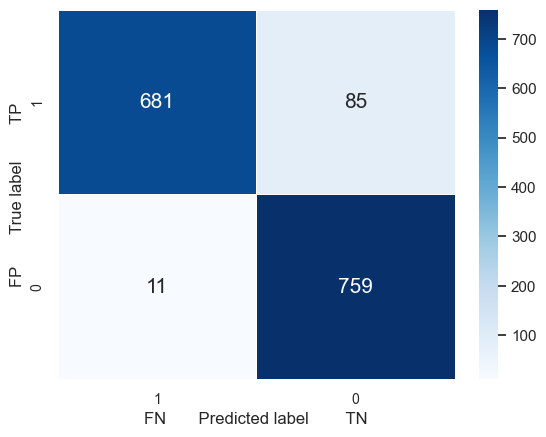

In [56]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [57]:
roc_auc_score(DT1_pred, y_test)

0.9416965728844205

##  Conclusion.

In [59]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('winep_predictions_test.csv', index=False)

### Question:
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

### Answers:

1.Binary classification was applied.

2.Classes were highly imbalanced with 78.36 % of '0' class and only 21.64 % of '1' class in our dataset.

3.Three options were applied in order to calculate the best predictions:

    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random under-sampling technique of an imbalanced dataset
    * Calculate predictions with random over-sampling technique of an imbalanced dataset

4.Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyperparameters).

5.The best result was choosen:

    * Random over-sampling dataset with 3838 entities in class '0' and 3838 enteties in class '1', 7676 entities in total.
    * Train/Test split: test_size=0.2, random_state=0
Decision Tree model without hyper parameters tuning, with an accuracy score equal 0.931295 and ROC-AUC score equal 0.943265